#### ***3. Build a chart to identify the top 10 tweets by the sum of retweets and likes. Filter out tweets posted on weekends and show the user profile that posted each tweet and this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself and the tweet impression should be even number and tweet date should be odd number as well as tweet word count be below 30.***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../twitter.csv')

In [2]:
# Convert 'date' to datetime objects
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1166 non-null   int64         
 1   Tweet                1166 non-null   object        
 2   id                   1166 non-null   float64       
 3   time                 1166 non-null   object        
 4   impressions          1166 non-null   int64         
 5   engagements          1166 non-null   int64         
 6   engagement rate      1166 non-null   float64       
 7   retweets             1166 non-null   int64         
 8   replies              1166 non-null   int64         
 9   likes                1166 non-null   int64         
 10  user profile clicks  1166 non-null   int64         
 11  url clicks           1166 non-null   int64         
 12  hashtag clicks       1166 non-null   int64         
 13  detail expands       1166 non-nul

In [4]:
df.head(5)

,Unnamed: 0,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,...,url clicks,hashtag clicks,detail expands,media views,media engagements,date,time_extracted,Day,Month,Year
0,0,id ligula suspendisse ornare consequat lectus ...,6.670000e+15,2020-06-30 21:09:00+00:00,365,4,0.010959,0,0,1,...,0,0,1,0,0,2020-06-30,21:09,30,6,2020
1,1,euismod scelerisque quam turpis adipiscing lor...,8.270000e+15,2020-06-30 17:14:00+00:00,184,2,0.010870,0,0,2,...,0,0,0,0,0,2020-06-30,17:14,30,6,2020
2,2,leo rhoncus sed vestibulum sit amet cursus id ...,2.810000e+14,2020-06-30 16:59:00+00:00,2644,46,0.017398,1,1,17,...,3,0,23,354,1,2020-06-30,16:59,30,6,2020
3,3,aenean lectus pellentesque eget nunc donec qui...,7.760000e+15,2020-06-30 13:55:00+00:00,301,3,0.009967,0,1,2,...,0,0,0,0,0,2020-06-30,13:55,30,6,2020
4,4,sed accumsan felis ut at dolor quis odio conse...,6.130000e+15,2020-06-30 12:13:00+00:00,528,0,0.000000,0,0,0,...,0,0,0,0,0,2020-06-30,12:13,30,6,2020


In [5]:
# Function to extract the last hashtag
def extract_last_hashtag(tweet):
    hashtags = re.findall(r'#(\w+)', tweet)
    if hashtags:
        return hashtags[-1]
    return None

# Apply the function to create a new 'user_profile' column
df['user_profile'] = df['Tweet'].apply(extract_last_hashtag)

In [6]:
# Filter 1: Exclude weekends
df_filtered = df[df['date'].dt.dayofweek < 5]

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1036 entries, 0 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1036 non-null   int64         
 1   Tweet                1036 non-null   object        
 2   id                   1036 non-null   float64       
 3   time                 1036 non-null   object        
 4   impressions          1036 non-null   int64         
 5   engagements          1036 non-null   int64         
 6   engagement rate      1036 non-null   float64       
 7   retweets             1036 non-null   int64         
 8   replies              1036 non-null   int64         
 9   likes                1036 non-null   int64         
 10  user profile clicks  1036 non-null   int64         
 11  url clicks           1036 non-null   int64         
 12  hashtag clicks       1036 non-null   int64         
 13  detail expands       1036 non-null   i

In [8]:
df.head(5)

,Unnamed: 0,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,...,hashtag clicks,detail expands,media views,media engagements,date,time_extracted,Day,Month,Year,user_profile
0,0,id ligula suspendisse ornare consequat lectus ...,6.670000e+15,2020-06-30 21:09:00+00:00,365,4,0.010959,0,0,1,...,0,1,0,0,2020-06-30,21:09,30,6,2020,tellus
1,1,euismod scelerisque quam turpis adipiscing lor...,8.270000e+15,2020-06-30 17:14:00+00:00,184,2,0.010870,0,0,2,...,0,0,0,0,2020-06-30,17:14,30,6,2020,ullamcorper
2,2,leo rhoncus sed vestibulum sit amet cursus id ...,2.810000e+14,2020-06-30 16:59:00+00:00,2644,46,0.017398,1,1,17,...,0,23,354,1,2020-06-30,16:59,30,6,2020,in
3,3,aenean lectus pellentesque eget nunc donec qui...,7.760000e+15,2020-06-30 13:55:00+00:00,301,3,0.009967,0,1,2,...,0,0,0,0,2020-06-30,13:55,30,6,2020,vulputate
4,4,sed accumsan felis ut at dolor quis odio conse...,6.130000e+15,2020-06-30 12:13:00+00:00,528,0,0.000000,0,0,0,...,0,0,0,0,2020-06-30,12:13,30,6,2020,nonummy


In [9]:
# Filter 2: Even number of impressions
df_filtered = df_filtered[df_filtered['impressions'] % 2 == 0]

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 1 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           532 non-null    int64         
 1   Tweet                532 non-null    object        
 2   id                   532 non-null    float64       
 3   time                 532 non-null    object        
 4   impressions          532 non-null    int64         
 5   engagements          532 non-null    int64         
 6   engagement rate      532 non-null    float64       
 7   retweets             532 non-null    int64         
 8   replies              532 non-null    int64         
 9   likes                532 non-null    int64         
 10  user profile clicks  532 non-null    int64         
 11  url clicks           532 non-null    int64         
 12  hashtag clicks       532 non-null    int64         
 13  detail expands       532 non-null    in

In [11]:
# Filter 3: Odd day of the month
df_filtered = df_filtered[df_filtered['date'].dt.day % 2 != 0]

In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 35 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           290 non-null    int64         
 1   Tweet                290 non-null    object        
 2   id                   290 non-null    float64       
 3   time                 290 non-null    object        
 4   impressions          290 non-null    int64         
 5   engagements          290 non-null    int64         
 6   engagement rate      290 non-null    float64       
 7   retweets             290 non-null    int64         
 8   replies              290 non-null    int64         
 9   likes                290 non-null    int64         
 10  user profile clicks  290 non-null    int64         
 11  url clicks           290 non-null    int64         
 12  hashtag clicks       290 non-null    int64         
 13  detail expands       290 non-null    i

In [13]:
# Filter 4: Tweet word count below 30
df_filtered = df_filtered[df_filtered['Tweet'].str.split().str.len() < 30]

In [14]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 35 to 1165
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           192 non-null    int64         
 1   Tweet                192 non-null    object        
 2   id                   192 non-null    float64       
 3   time                 192 non-null    object        
 4   impressions          192 non-null    int64         
 5   engagements          192 non-null    int64         
 6   engagement rate      192 non-null    float64       
 7   retweets             192 non-null    int64         
 8   replies              192 non-null    int64         
 9   likes                192 non-null    int64         
 10  user profile clicks  192 non-null    int64         
 11  url clicks           192 non-null    int64         
 12  hashtag clicks       192 non-null    int64         
 13  detail expands       192 non-null    i

In [15]:
# Calculate total engagement
df_filtered['total_engagement'] = df_filtered['retweets'] + df_filtered['likes']

# Get the top 10 tweets
top_10_tweets = df_filtered.sort_values(by='total_engagement', ascending=False).head(10)

In [16]:
# Get the top 10 tweets
top_10_tweets = df_filtered.sort_values(by='total_engagement', ascending=False).head(10).copy()

# Add a serial number for plotting and table
top_10_tweets['serial_number'] = range(1, len(top_10_tweets) + 1)

In [17]:
# --- Column Inspection ---
print("\n--- Available Columns ---")
print(top_10_tweets.columns.tolist())


--- Available Columns ---
['Unnamed: 0', 'Tweet', 'id', 'time', 'impressions', 'engagements', 'engagement rate', 'retweets', 'replies', 'likes', 'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands', 'media views', 'media engagements', 'date', 'time_extracted', 'Day', 'Month', 'Year', 'user_profile', 'total_engagement', 'serial_number']


findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Font family 'Noto Color Emoji' not found.
findfont: Fo

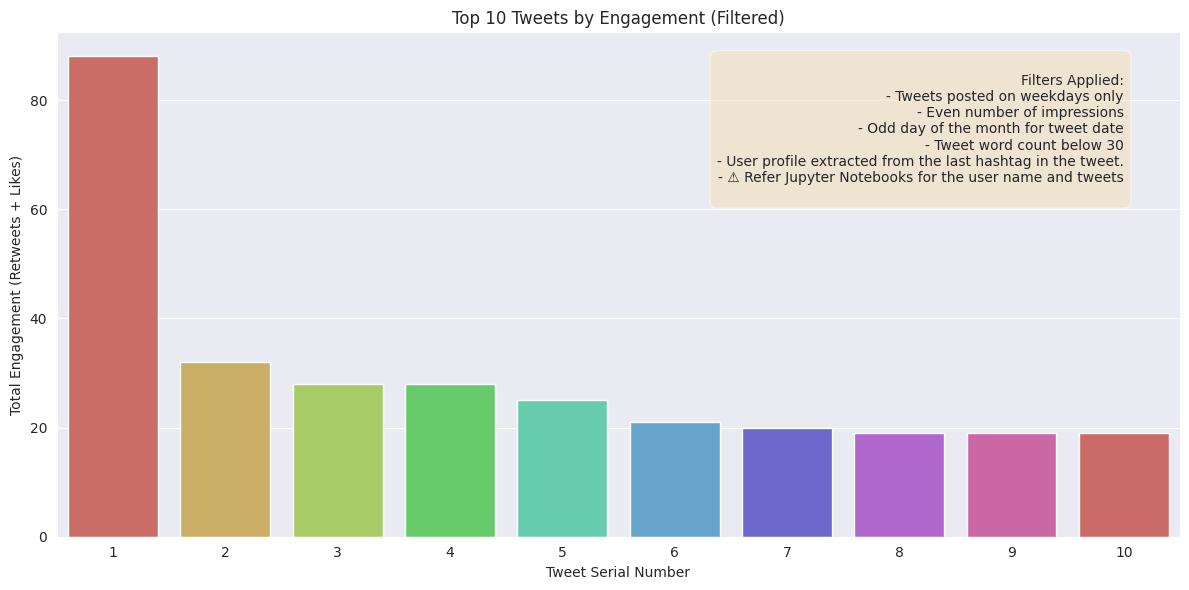


--- Top 10 Tweets Details (Filtered & Truncated) ---
|   serial_number | Tweet                                                 |   total_engagement | user_profile   |
|----------------:|:------------------------------------------------------|-------------------:|:---------------|
|               1 | justo in hac habitasse platea dictumst etiam fauci... |                 88 | est            |
|               2 | enim leo rhoncus sed vestibulum sit amet cursus id... |                 32 | vestibulum     |
|               3 | pellentesque eget nunc donec quis orci eget orci v... |                 28 | in             |
|               4 | faucibus cursus urna ut tellus nulla ut erat id ma... |                 28 | ut             |
|               5 | nulla neque libero convallis eget eleifend luctus ... |                 25 | erat           |
|               6 | integer tincidunt ante vel ipsum praesent blandit ... |                 21 | sem            |
|               7 | justo etiam pr

In [18]:
from matplotlib import rcParams

# Set a font that supports emojis (e.g., Noto Color Emoji on Linux)
rcParams['font.family'] = 'Noto Color Emoji'

# --- Plot Generation ---
plt.figure(figsize=(12, 6))

# Assign hue to x and disable legend to mimic original behavior
sns.barplot(x='serial_number', y='total_engagement', hue='serial_number',
            data=top_10_tweets, palette='hls', legend=False)

# Add labels and title
plt.xlabel('Tweet Serial Number')
plt.ylabel('Total Engagement (Retweets + Likes)')
plt.title('Top 10 Tweets by Engagement (Filtered)')

# Add a description of the filters
filter_description = """
Filters Applied:
- Tweets posted on weekdays only
- Even number of impressions
- Odd day of the month for tweet date
- Tweet word count below 30
- User profile extracted from the last hashtag in the tweet.
- ⚠️ Refer Jupyter Notebooks for the user name and tweets
"""

plt.text(0.95, 0.95, filter_description,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.tight_layout()
# plt.savefig('task_03_top_10_tweets_filtered_bar_plot.png')
plt.show()

# --- Table Generation ---
# Check for missing 'user_profile' column
expected_cols = ['serial_number', 'Tweet', 'total_engagement', 'user_profile']
available_cols = [col for col in expected_cols if col in top_10_tweets.columns]

if 'user_profile' not in top_10_tweets.columns and 'Tweet' in top_10_tweets.columns:
    # Attempt to extract user_profile from last hashtag
    top_10_tweets['user_profile'] = top_10_tweets['Tweet'].apply(
        lambda x: x.split('#')[-1].strip() if '#' in x else 'N/A'
    )
    available_cols = [col for col in expected_cols if col in top_10_tweets.columns]

# Truncate tweet text to 80 characters for display
table_data = top_10_tweets[available_cols].copy()
table_data['Tweet'] = table_data['Tweet'].apply(lambda x: x[:50] + '...' if len(x) > 80 else x)

# Display as markdown-style table
print("\n--- Top 10 Tweets Details (Filtered & Truncated) ---")
print(table_data.to_markdown(index=False))